In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
df =pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)

/var/folders/48/sjhcgn5d03dg2p_w7g0zzsr40000gn/T/ipykernel_46296/2734720167.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df =pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)


<Axes: xlabel='Date'>

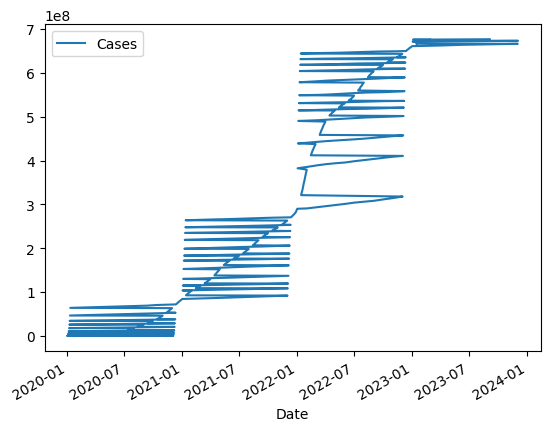

In [39]:
df.plot()

In [40]:
dfr=df.resample('D').ffill()

In [41]:
dfr.head()

,Cases
Date,
2020-01-02,12038
2020-01-03,88402
2020-01-04,955728
2020-01-05,3371033
2020-01-06,6283580


In [42]:
dfr.index.freq='D'

<Axes: xlabel='Date'>

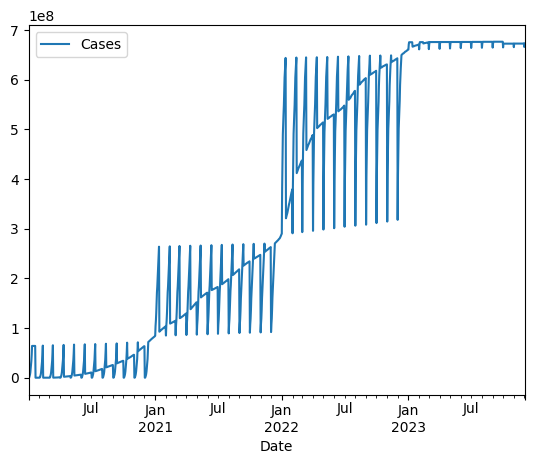

In [43]:
dfr.plot()

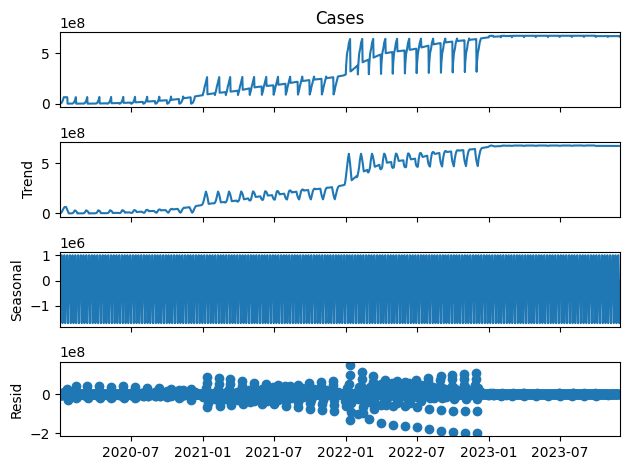

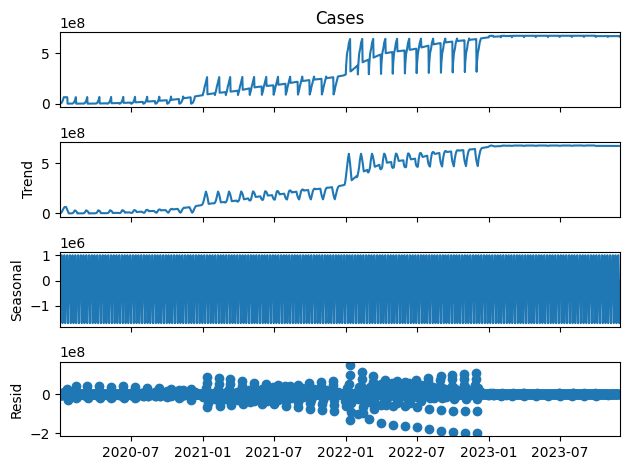

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(dfr['Cases'])
results.plot()
     

In [45]:
len(dfr)

1431

In [46]:
80*1431

114480

In [47]:
0.8*1431

1144.8

In [48]:
# train = dfr.iloc[:1144]
# test = dfr.iloc[1144:]
     

In [49]:
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [50]:
dfr.head(),dfr.tail()

(              Cases
 Date               
 2020-01-02    12038
 2020-01-03    88402
 2020-01-04   955728
 2020-01-05  3371033
 2020-01-06  6283580,
                 Cases
 Date                 
 2023-11-28  672828531
 2023-11-29  672828531
 2023-11-30  672828531
 2023-12-01  666097539
 2023-12-02  672906177)

In [51]:
# scaler.fit(train)
# scaled_train = scaler.transform(train)
# scaled_test = scaler.transform(test)

In [52]:
def scaleandpreparedata(dfr):
    n=len(dfr)
    p=int(n*0.8)
    train=dfr.iloc[:p]
    test=dfr.iloc[p:]

    scaler = MinMaxScaler()
    scaler.fit(train)
    scaled_train = scaler.transform(train)
    scaled_test = scaler.transform(test)
    return (scaled_train,scaled_test,test,scaler)

In [53]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [54]:
# n_input = 12
# n_features = 1
# generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=16)
     

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [56]:
# define model
# model = Sequential()
# model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
# model.add(Dense(1))
# model.compile(optimizer='adam', loss='mse')

In [57]:
# model.summary()

In [58]:
def createModelandTrainModel(scaled_train,n_input,n_features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')


    # n_input = 12
    # n_features = 1
    generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=32)
    model.fit(generator,epochs=50)
    return model


In [59]:
# model.fit(generator,epochs=50)

In [60]:
# last_train_batch = scaled_train[-12:]

In [61]:
# last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [62]:
# model.predict(last_train_batch)

In [63]:
# scaled_test[0]

In [64]:
def functionforprediction(dfr,n_input):
    n_features=1
    test_predictions = []
    (scaled_train,scaled_test,testp,scaler)=scaleandpreparedata(dfr)
    model=createModelandTrainModel(scaled_train,n_input,n_features)
    first_eval_batch = scaled_train[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(len(testp)):
    
    # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
        test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
     
    true_predictions = scaler.inverse_transform(test_predictions).astype(int)
    return (true_predictions,testp)

In [65]:
(true_predictions,test)=functionforprediction(dfr,12)

Epoch 1/50


/Users/swoyamsiddharth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2471  
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153
Epoch 3/50
 1/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191

/Users/swoyamsiddharth/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0083
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0067
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0063
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060    
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0053
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0040
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0060    
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052    
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048    
Epoch 16/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038    
Epoch 17/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0057
Epoch 18

In [66]:
test.head()

,Cases
Date,
2023-02-19,674056229
2023-02-20,674143589
2023-02-21,674323721
2023-02-22,674569824
2023-02-23,674790916


In [67]:
# test_predictions,scaled_test

In [68]:
# true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions.astype(int)


/var/folders/48/sjhcgn5d03dg2p_w7g0zzsr40000gn/T/ipykernel_46296/3919622673.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions.astype(int)


In [69]:
test.head()

,Cases,Predictions
Date,,
2023-02-19,674056229,664186103
2023-02-20,674143589,657180249
2023-02-21,674323721,650397205
2023-02-22,674569824,644478096
2023-02-23,674790916,639682306


<Axes: xlabel='Date'>

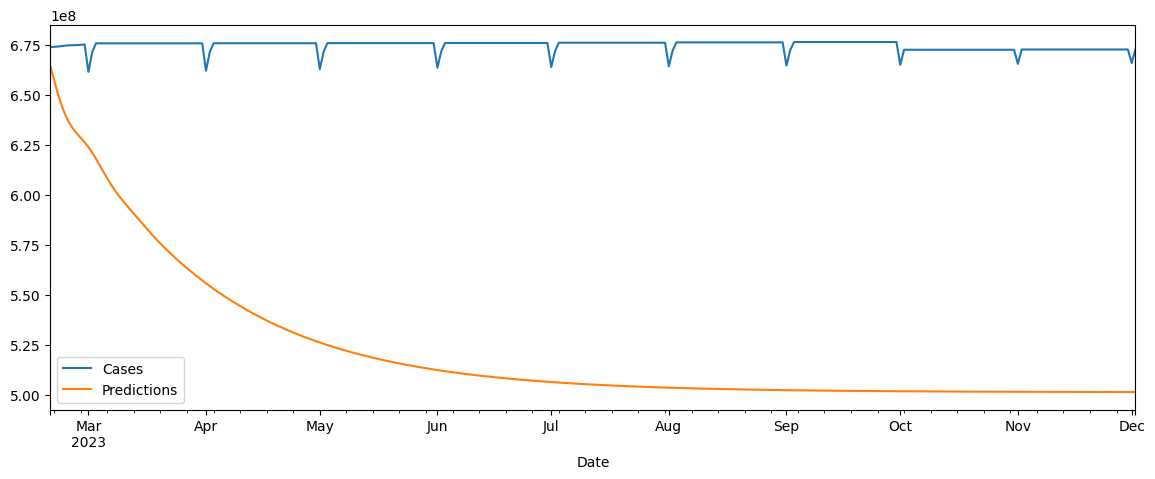

In [70]:
test.plot(figsize=(14,5))

In [71]:
testm=test.resample('M').sum()

/var/folders/48/sjhcgn5d03dg2p_w7g0zzsr40000gn/T/ipykernel_46296/1631276972.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  testm=test.resample('M').sum()


<Axes: xlabel='Date'>

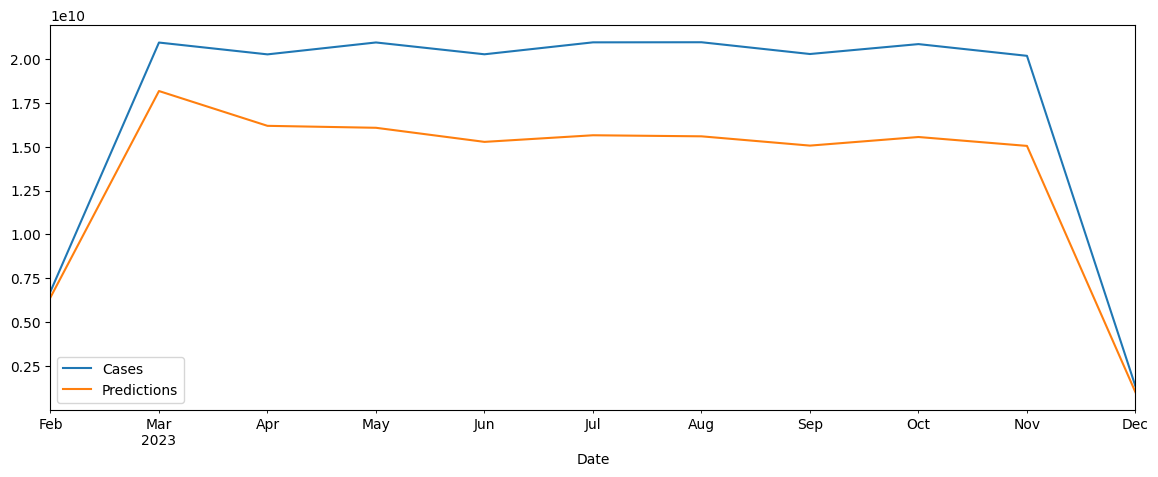

In [72]:
testm.plot(figsize=(14,5))

In [73]:
def scaledata(data):
    scaler = MinMaxScaler()
    scaler.fit(data)
    scaled_train = scaler.transform(data)
    return (scaled_train,scaler)



def trainmodelondata(input):
    n_input = 12
    n_features = 1
    test_predictions = []
    data=pd.DataFrame(input)
    (scaled_data,scaler)=scaledata(data)
    model=createModelandTrainModel(scaled_data,n_input,n_features)
    first_eval_batch = scaled_data[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))

    for i in range(1143):
    
    # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
        test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions).astype(int)
    return true_predictions




    


In [74]:
testi=dfr.iloc[1141:]
tp=trainmodelondata(testi)


/Users/swoyamsiddharth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.7564  
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4449 
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1840 
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0429 
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0341 
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0256 
Epoch 7/50
1/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0307

/Users/swoyamsiddharth/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274 
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0261 
Epoch 9/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0258 
Epoch 10/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0210 
Epoch 11/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0213 
Epoch 12/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0274 
Epoch 13/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 
Epoch 14/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0258 
Epoch 15/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0312 
Epoch 16/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0253 
Epoch 17/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0229 
Epoch 18/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0265 
Epoch 19/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0236 
Epoch 20/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0219 
Epoch 21/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0240 
Epoch 22/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s

In [75]:
len(tp)

109

In [76]:
type(testi)

pandas.core.frame.DataFrame

In [77]:
input=[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
input2=pd.DataFrame(input)


In [78]:
tp=trainmodelondata(input2)


Epoch 1/50


/Users/swoyamsiddharth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 834ms/step - loss: 0.9817
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9507
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9200
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8894
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8591
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.8293
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8008
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7731
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7456
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7181
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6908
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6641
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6378
Epoch 14/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6114
Epoch 15/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5849
Epoch 16/50


/Users/swoyamsiddharth/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5583
Epoch 17/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5314
Epoch 18/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5043
Epoch 19/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4770
Epoch 20/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4493
Epoch 21/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4222
Epoch 22/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3955
Epoch 23/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3685
Epoch 24/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3410
Epoch 25/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3134
Epoch 26/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2861
Epoch 27/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2591
Epoch 28/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2321
Epoch 29/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2049
Epoch 30/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1776
Epoch 31/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 

/var/folders/48/sjhcgn5d03dg2p_w7g0zzsr40000gn/T/ipykernel_46296/2062302946.py:29: RuntimeWarning: invalid value encountered in cast
  true_predictions = scaler.inverse_transform(test_predictions).astype(int)


In [79]:
len(tp)

109

In [80]:
df = pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)
df.head()

/var/folders/48/sjhcgn5d03dg2p_w7g0zzsr40000gn/T/ipykernel_46296/366164483.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("../Dataset/global_cases.csv",index_col='Date',parse_dates=True)


,Cases
Date,
2020-01-22,557
2020-01-23,657
2020-01-24,944
2020-01-25,1437
2020-01-26,2120


In [81]:
lst=[]
for index, row in df.iterrows():
    lst.append(row['Cases'])

In [82]:
# lst predicted after 500
lst2 = trainmodelondata(lst[:500])

Epoch 1/50


/Users/swoyamsiddharth/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1888  
Epoch 2/50
 5/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3158

/Users/swoyamsiddharth/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2250
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0842    
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0974 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0231 
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016     
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0019     
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6984e-04 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4108e-04 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.2456e-05 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4412e-05 
Epoch 13/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2273e-05 
Epoch 14/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.7801e-05 
Epoch 15/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8972e-05 
Epoch 16/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3

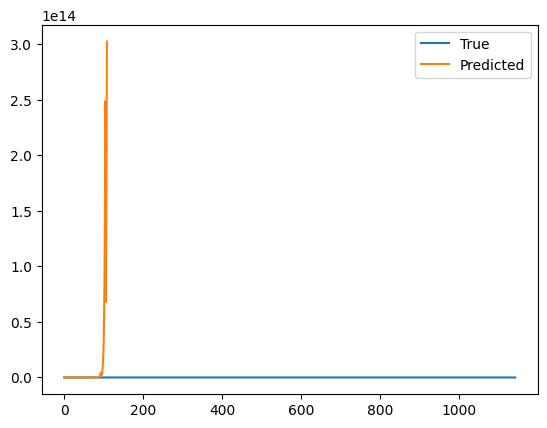

In [86]:
import matplotlib.pyplot as plt

# Plotting lst1 and lst2
plt.plot(lst, label='True')
plt.plot(lst2, label='Predicted')

# Adding legend
plt.legend()

# Display the plot
plt.show()
